<a href="https://colab.research.google.com/github/jackie-charms/NovaPlastic/blob/master/Pr%C3%A1cticas/Convolution_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage import io, color, exposure
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img=io.imread('/content/drive/MyDrive/Colab Notebooks/descarga (1).jfif')

In [3]:
img.shape

(662, 750, 3)

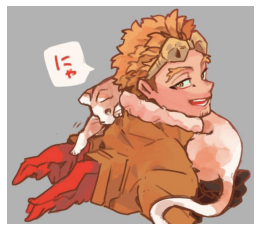

In [4]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
img=color.rgb2gray(img[:, :, 0:3])

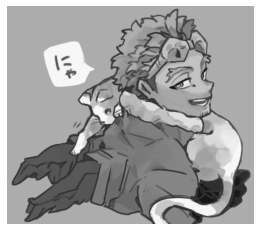

In [6]:
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [7]:
img.shape

(662, 750)

In [8]:
def convolved2d(image, kernel):
  kernel = np.flipud(np.fliplr(kernel))
  output = np.zeros_like(image)
  image_padded = np.zeros((image.shape[0] + 2, image.shape[1]+2))
  image_padded[1:-1, 1:-1] = image
  for x in range(image.shape[1]):
    for y in range(image.shape[0]):
      output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()
  return output

In [9]:
kernel = np.array( [ [-1, -2, -1], [0, 0, 0], [1, 2, 1] ] )
image_filt = convolved2d(img, kernel)

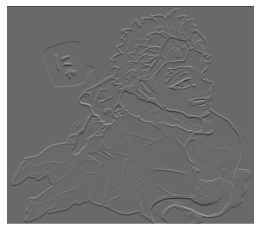

In [10]:
plt.imshow(image_filt, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

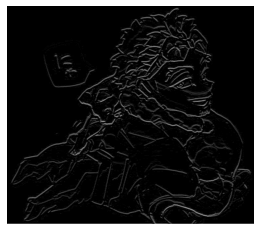

In [11]:
image_filt_equalized = exposure.equalize_adapthist(image_filt/np.max(np.abs(image_filt)), clip_limit=0.03)
plt.imshow(image_filt_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()